<a href="https://colab.research.google.com/github/AgungDaffa/machine/blob/main/kuis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 4

1. Agung
2. Aryo
3. Marsa

In [17]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


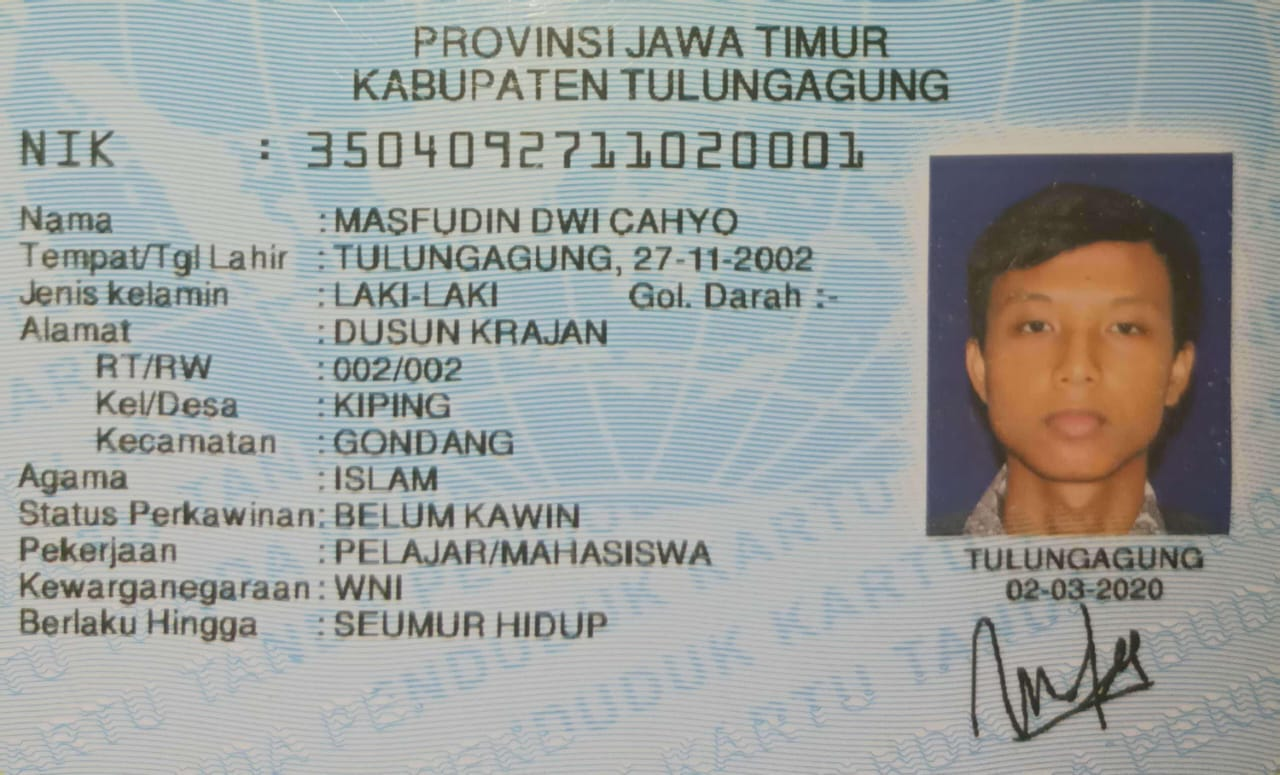

In [18]:
# Baca gambar menggunakan OpenCV
image = cv2.imread('/content/drive/MyDrive/KTP_ML/KTP_17.jpeg')

cv2_imshow(image)
import os

PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

 
   

NIK : 350409271102000)
Nama *-MASFUDIN DWI CAHYQ
Tempat/Tgi Lah : TULUNGAGUNG, 27-11-2002
Jenis kelamin : LAKI-LAKI Gol. Darah :- :
Alamat : DUSUN KRAJAN
RI/RW : 002/002
Kel/Desa -KIPING 3
Kecamalan :GONDANG
Againa ISLAM F v
Status Perkawinan: BEILUM KAWIN rae a
Pekenaan -PEL AJAR/MAHASISWA TULUNGAGUNG -

Kewarganegaraan: WNI ~
BerlakuHingga © SEUMURHIDUP “

 



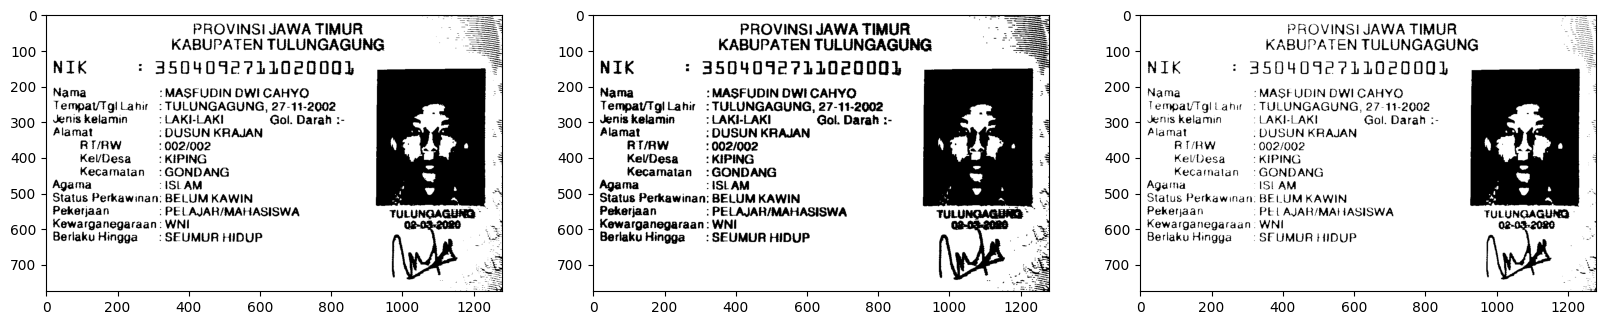

In [ ]:
# import random
# import os

# directory = "/content/drive/MyDrive/KTP_ML"

# image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# selected_images = random.sample(image_files, 1)

# for image_file in selected_images:
#   image_path = os.path.join(directory, image_file)
#   img = cv2.imread(image_path)
#   # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   # th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
#   # Konversi gambar ke grayscale
#   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#   blurred = cv2.GaussianBlur(gray, (5,5), 0.5)

#   res, th = cv2.threshold(blurred.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#   kernel = np.ones((2,2),np.uint8)
#   erosion = cv2.erode(th.copy(),kernel,iterations = 1)
#   dilation = cv2.dilate(th.copy(),kernel,iterations = 1)

#   edge = cv2.Canny(th, 100, 200)

#   fig, ax = plt.subplots(1,3, figsize=(20,6))
#   ax[0].imshow(th, cmap='gray')
#   ax[1].imshow(erosion, cmap='gray')
#   ax[2].imshow(dilation, cmap='gray')

#   # Pytesseract image to string
#   text = pytesseract.image_to_string(dilation)
#   print(text)

In [19]:
# Ubah gambar ke dalam skala abu-abu
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

## (3) Detect
result = pytesseract.image_to_string(threshed)

## (5) Normalize
for word in result.split("\n"):
  if "”—" in word:
    word = word.replace("”—", ":")

  if "?" in word:
      word = word.replace("?", "7")

  if ">" in word:
      word = word.replace(">", ":")

  if "‘" in word:
      word = word.replace("‘", ":")

  if "_:" in word:
      word = word.replace("_:", ":")

  if "(" in word:
      word = word.replace("(", "/")

  if "|" in word:
      word = word.replace("|", "L")

  #normalize NIK
  if "NIK" in word:
    nik_char = word.split()
    if "D" in word:
      word = word.replace("D", "0")
    if "L" in word:
      word = word.replace("L", "1")
    if "%" in word:
      word = word.replace("%", "9")
    if "e" in word:
      word = word.replace("e", "2")

  #normalize TTL
  if "Tempat/Tgl Lahir" in word:
    if "." in word:
      word = word.replace(".", ",")

  #normalize Alamat
  if "Alamat" in word:
    if "." in word:
      word = word.replace(".", ",")
    if "Alamat" in word:
      word = word.replace("Alamat", "Alamat :")

  #normalize Agama
  if "Agama" in word:
    if '"' in word:
      word = word.replace('"', ":")

  #normalize Jenis Kelamin
  if "denis Kelamin" in word:
    word = word.replace("denis Kelamin", "Jenis Kelamin")

  #normalize Gol Darah
  if "Gol Darah" in word:
    word = word.replace("Gol Darah", "\n\nGol Darah :")

  #normalize RTRW
  if "RTARW" in word:
    word = word.replace("RTARW", "\nRT/RW")

  #normalize Kecamatan
  if "Kecamatan" in word:
    word = word.replace("Kecamatan", "\nKecamatan")

  #normalize Status Perkawinan
  if "Status Rea" in word:
    word = word.replace("Status Rea", "\nStatus Perkawinan :")

  #normalize Pekerjaan
  if "Pekerjaan" in word:
    word = word.replace("Pekerjaan", "\nPekerjaan")

  #normalize Berlaku Hingga
  if "Berlaku Hingga" in word:
    word = word.replace("Berlaku Hingga", "\nBerlaku Hingga")


  print(word)

PROVINSI JAWA TIMUR
KABUPATEN TULUNGAGUNG

 

NIK : 350409227111020001
Nama :-MASFUDIN DWI CAHYO
empat/Tgll ahir TULUNGAGUNG, 27-11-2002

Jenis kelamin LAKI-LAKI Gol. Darah :
Alamat : DUSUN KRAJAN

RI/RW 002/002

Kel/Desa KIPING

Kecatnatan GONDANG
Agama ISL AM
Status Perkawinan KE UM KAWIN Ss te
Pekenaan PE L AJAR/MAHASISWA TULUNGAGUNG
Kewarganegataan WNI 02-03-2020


Berlaku Hingga

SEUMUR HIDUP

